# ***Автокодировщики***

---







В этом ноутбуке  вы узнаете больше об автокодировщиках и о том, как создавать сверточные и шумоподавляющие автокодировщики с набором данных notMNIST в Keras.

**Автоэнкодеры** — это нейронные сети прямого распространения, которые *восстанавливают входной сигнал на выходе*. Внутри у них имеется скрытый слой, который представляет собой код, описывающий модель. Автоэнкодеры конструируются таким образом, чтобы не иметь возможность точно скопировать вход на выходе. Обычно их ограничивают в размерности кода (он меньше, чем размерность сигнала) или штрафуют за активации в коде. Входной сигнал восстанавливается с ошибками из-за потерь при кодировании, но, чтобы их минимизировать, сеть вынуждена учиться отбирать наиболее важные признаки.


**Автоэнкодер (автокодировщик)** - это неконтролируемый алгоритм машинного обучения, который принимает изображение в качестве входных данных и пытается восстановить его, используя меньшее количество бит из узкого места, также известного как скрытое пространство. Изображение в основном сжато в узком месте. Сжатие в автоэнкодерах достигается путем обучения сети в течение определенного периода времени, и, по мере того, как она обучается, она пытается наилучшим образом представить входное изображение в узком месте. Общие алгоритмы сжатия изображений, такие как JPEG, используют методы сжатия без потерь, сжимают изображения без необходимости какого-либо обучения и преуспевают в сжатии изображений.

Автоэнкодеры похожи на методы уменьшения размерности, такие как анализ основных компонентов (PCA). PCA проецирует данные из более высокого измерения в более низкое измерение с помощью линейного преобразования и пытается сохранить важные характеристики данных, удаляя ненужные части.

Однако основное различие между автоэнкодерами и PCA заключается в части преобразования:  PCA использует линейное преобразование, тогда как автоэнкодеры используют нелинейные преобразования.

![            alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/AutoEncoder_kfqad1.png)

Рисунок выше представляет собой двухслойный  автоэнкодер с одним скрытым слоем. В терминологии глубокого изучения    входной слой никогда не учитывается при подсчете общего количества слоев в архитектуре. Общее количество уровней в архитектуре состоит только из числа скрытых уровней и выходного уровня.

Как показано на рисунке выше, входной и выходной слои имеют одинаковое количество нейронов.

Рассмотрим пример. Подается изображение с пятью значениями пикселей в автоэнкодер. Изображение  кодируется сжатием в три значения пикселей в узком месте (средний слой) или в скрытом пространстве. Используя эти три значения, декодер пытается восстановить пять значений пикселей, а точнее входное изображение, которое было передано в качестве входа в сеть.

В действительности между входом и выходом существует больше скрытых слоев.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1522830223/Autoencoder_structure_af1jh8.png)

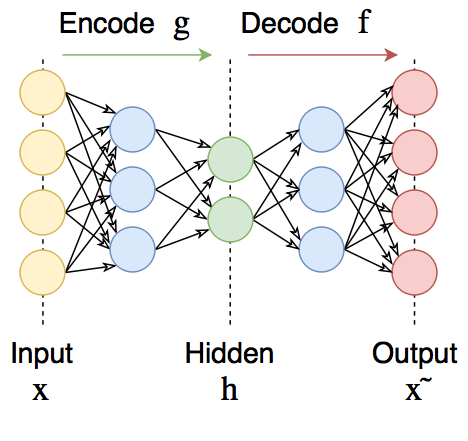

Автоэнкодер можно разбить на три части: энкодер (кодировщик), кодировка (узкое место), декодер (декодировщик).

**Энкодер** (g(x)): эта часть сети сжимает или сокращает входные данные до меньшего числа бит. Пространство, представленное этим меньшим количеством битов, часто называют скрытым пространством или узким местом. Другими словами, энкодер переводит входной сигнал в его представление (код): h = g(x).

**Узкое место** (h=g(x)) также называют «максимальной точкой сжатия», поскольку в этот момент вход сжимается максимально. Эти сжатые биты, которые представляют исходный ввод,  называются «кодированием» ввода.

**Декодер**(x=f(h)): эта часть сети пытается восстановить вход, используя кодировку h, другими словами, декодер восстанавливает сигнал по его коду: x=f(h). Когда декодер способен реконструировать вход точно так, как он был подан на кодер,  можно сказать, что кодер способен производить наилучшее кодирование h, с которым декодер способен хорошо восстанавливать!


При обучении автоэнкодер, изменяя f и g, стремится выучить тождественную функцию x = f(g(x)), минимизируя некоторый функционал ошибки
L(x, f(g(x))).

При этом семейства функций энкодера g и декодера f как-то ограничены, чтобы автоэнкодер был вынужден отбирать наиболее важные свойства сигнала.

Сама по себе способность автоэнкодеров сжимать данные используется редко, так как обычно они работают хуже, чем вручную написанные алгоритмы для конкретных типов данных вроде звуков или изображений. А также для автоэнкодеров критически важно, чтобы данные принадлежали той генеральной совокупности, на которой сеть обучалась. Обучив автоэнкодер на цифрах, его нельзя применять для кодирования чего-то другого (например, человеческих лиц).

Однако автоэнкодеры можно использовать для предобучения, например, когда стоит задача классификации, а размеченных пар слишком мало. Или для понижения размерности в данных для последующей визуализации. Либо когда просто надо научиться различать полезные свойства входного сигнала.

Более того, некоторые их развития , такие как вариационный автоэнкодер (VAE), а также его сочетание с состязающимися генеративным сетями (GAN), дают очень интересные результаты и находятся сейчас на переднем крае науки о генеративных моделях.

Существуют различные автоэнкодеры, такие как сверточный автоэнкодер, автоинкодер с шумоподавлением, вариационный автоэнкодер и разреженный автоэнкодер. В этом уроке будут рассмотрены только  сверточные и шумоподавляющие  автокодировщики.

# Практическая разработка автокодировщиков (автоэнкодеров)

В следующем фрагменте задается порядок устройств CUDA и видимые устройства CUDA

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" #model will be trained on GPU 0  по умолчанию

# Импорт библиотек

 Вы импортируете все необходимые модули, как numpy, matplotlib и самое главное keras, так как  будете использовать этот фреймворк в сегодняшнем уроке!

In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Загрузка данных

Набор данных notMNIST является набором данных распознавания изображений глифитов шрифтов для букв от A до J. Он очень похож на классический набор данных MNIST , который содержит изображения рукописных цифр от 0 до 9: в этом случае вы обнаружите, что набор данных NotMNIST включает в себя 28x28 изображений в градациях серого, состоящих из 70000 букв от A-J в общей сложности 10 категорий и 6000 изображений в каждой категории.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Исследование данных

Теперь давайте проанализируем, как выглядят изображения в наборе данных, а также увидим размерность изображений с помощью атрибута массива NumPy .shape:

In [ ]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=train_data.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_data.shape))

Training set (images) shape: (50000, 32, 32, 3)
Test set (images) shape: (10000, 32, 32, 3)


Из вышеприведенного   анализа видно, что тренировочные данные имеют форму 60000 x 28 x 28, поскольку в каждой матрице размером 28 x 28 имеется 60000 обучающих выборок. Аналогично, данные тестовых испытаний имеют форму 10000 x 28 x 28, поскольку имеется 10000 образцов для испытаний.

Обратите внимание, что в этом задании вы не будете использовать ярлыки обучения и тестирования. Задача будет касаться только тренировочных и тестовых изображений. Тем не менее, для целей исследования, которые могут помочь вам лучше понять данные, вы будете использовать метки.

Давайте создадим словарь, который будет иметь имена классов с соответствующими категориальными метками классов:

In [ ]:
# Create dictionary of target classes
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Теперь давайте взглянем на пару изображений в  наборе данных:

<ipython-input-6-2c7c072ed17a>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("(Label: " + label_dict[int(curr_lbl)] + ")")
<ipython-input-6-2c7c072ed17a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("(Label: " + str(label_dict[int(curr_lbl)]) + ")")


Text(0.5, 1.0, '(Label: cat)')

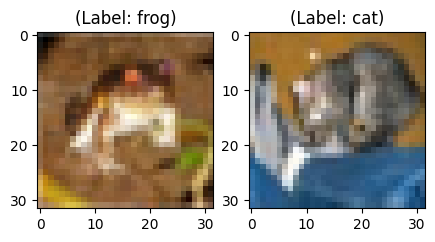

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_data[0], (32,32,3))
curr_lbl = train_labels[0]
plt.imshow(curr_img)
plt.title("(Label: " + label_dict[int(curr_lbl)] + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[0], (32,32,3))
curr_lbl = test_labels[0]
plt.imshow(curr_img)
plt.title("(Label: " + str(label_dict[int(curr_lbl)]) + ")")

Выходные данные двух  рисунков представляют собой один из образцов изображений данных обучения и тестирования, и этим изображениям присваивается метка класса 5 или F, с одной стороны, и 3 или D, с другой стороны. Аналогично, другие символы будут иметь разные метки, но похожие символы будут иметь одинаковые метки. Это означает, что все 6000 F изображений классов будут иметь метку класса 5.

# Предварительная обработка данных

Изображения набора данных действительно являются полутоновыми изображениями со значениями пикселей в диапазоне от 0 до 255 с размером 28 x 28, поэтому перед подачей данных в модель очень важно предварительно обработать их. Сначала вы преобразуете каждое изображение обучающего и тестового набора размером 28 x 28 в матрицу размером 28 x 28 x 1, которую вы можете передать в сеть:

In [ ]:
#train_data = train_data.reshape(-1, 28,28, 1)
#test_data = test_data.reshape(-1, 28,28, 1)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data.shape, test_data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Далее, вы должны убедиться, что проверили тип данных обучающего и тестового массивов NumPy, он должен быть в формате float32, если нет, вам нужно будет преобразовать его в этот формат, но так как вы уже конвертировали его при чтении данных Вам больше не нужно делать это снова. Вы также должны изменить масштаб значений пикселей в диапазоне от 0 до 1 включительно. Итак, давайте сделаем это!

Не забудьте проверить типы данных обучения и тестирования:

In [ ]:
train_data.dtype, test_data.dtype

(dtype('float32'), dtype('float32'))

Затем измените масштаб данных обучения и тестирования, нормализуете данные обучения и тестирования:

In [ ]:
np.max(train_data), np.max(test_data)

(255.0, 255.0)

In [ ]:
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

Давайте проверим максимальное значение данных обучения и тестирования, которое должно быть 1,0 после его масштабирования!

In [ ]:
np.max(train_data), np.max(test_data)

(1.0, 1.0)

После всего этого важно разделить данные. Чтобы  модель хорошо обобщала, разобьем данные обучения на две части: обучающий и проверочный наборы. Будем обучать  модель на 80% данных и проверять ее на 20% оставшихся данных набора.

Это также поможет  снизить вероятность переобучения, поскольку  будем   проверять  модель на данных, которых она не видела  на этапе обучения.

Будем использовать train_test_split модуль scikit-learn для правильного разделения данных:

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.2,
                                                             random_state=13)

Обратите внимание, что для этой задачи  не нужны обучающие и тестирующие ярлыки (метки, эталоны выхода). Первые два аргумента функции train_test_split - это тренировочная выборка. Тренировочные образы выступают и как исходные  и как выходные  данные, тем самым ставится перед нейронной сетью цель при обучении так подобрать весовые коэффициенты, чтобы на выходе сигнал как можно меньше отличался от входного.

Теперь все готово для определения сети и подачи данных в сеть. Так что без лишних слов, давайте перейдем к следующему шагу!

# Сверточный автоэнкодер

Изображения имеют размер 28 x 28 x 1 или 784-мерный вектор. Вы преобразуете матрицу изображения в массив, масштабируете ее от 0 до 1, изменяете ее форму таким образом, чтобы она имела размер 28 x 28 x 1, и подаете ее в качестве входных данных в сеть.

Кроме того, вы будете использовать размер мини-пакета 128, затем попробуете  более высокий размер пакета 256 или 512. Путем изменения значений гиперпараметров осуществляется  определение параметров обучения, которые влияют на точность прогноза. Вы будете тренировать свою сеть в течение 50 эпох.

In [ ]:
batch_size = 256
epochs = 50
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

Как обсуждалось ранее, автоэнкодер разделен на две части: есть кодер(кодировщик) и декодер(Дешифратор).

**Кодировщик**

Первый слой будет иметь 32 фильтра размером 3 x 3, за которыми следует слой понижающей дискретизации (max-pooling),
Второй слой будет иметь 64 фильтра размером 3 x 3, а затем еще один слой понижающей дискретизации,
Последний слой кодера будет иметь 128 фильтров размером 3 x 3.


**Декодировщик**

Первый слой будет иметь 128 фильтров размером 3 x 3, за которыми следует слой с повышением частоты дискретизации.
Второй слой будет иметь 64 фильтра размером 3 x 3, за которыми следует еще один слой с повышением частоты дискретизации.
Последний слой кодера будет иметь 1 фильтр размером 3 x 3.
Слой max-pooling будет понижать дискретизацию входных данных два раза каждый раз, когда вы используете его, в то время как слой повышающей дискретизации будет повышать дискретизацию входных данных два раза каждый раз, когда он используется.

Примечание : количество фильтров, размер фильтра, количество слоев, количество эпох, которые вы тренируете в своей модели, являются гиперпараметрами и должны определяться исходя из вашей собственной интуиции, вы можете попробовать новые эксперименты, настроив эти гиперпараметры и измерить производительность вашей модели. И так вы постепенно освоите искусство глубокого обучения!

In [ ]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1) #14 x 14 x 32
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2) #7 x 7 x 64
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    #decoder
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

После того, как модель создана, вы должны скомпилировать ее, используя оптимизатор RMSProp. Обратите внимание, что вы также должны указать тип потерь через аргумент loss. В данном случае это среднеквадратическая ошибка, поскольку потери после каждой партии будут рассчитываться между партией прогнозируемых выходных данных и истинной величиной, используя среднеквадратичную ошибку пиксель за пикселем:

In [ ]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

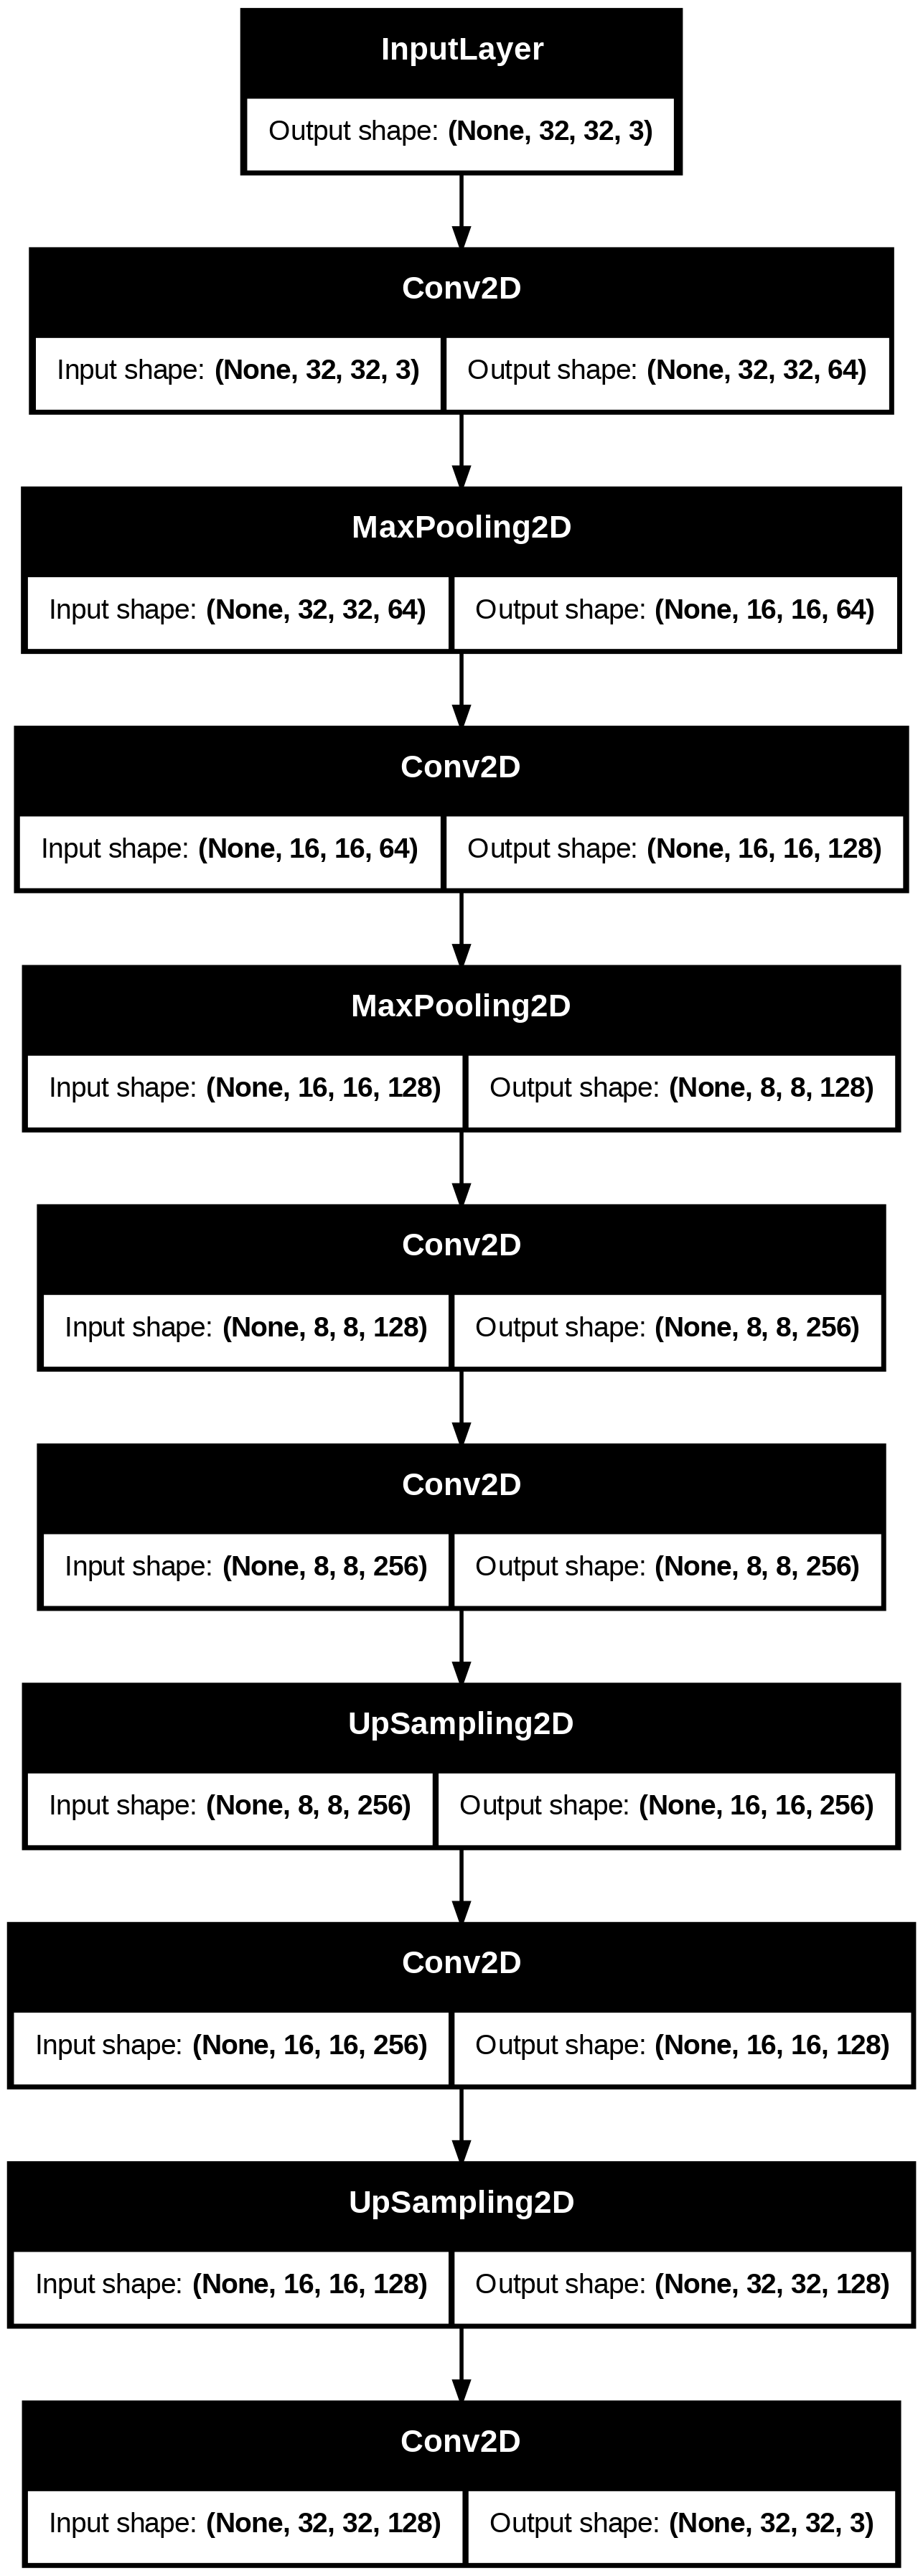

In [ ]:
keras.utils.plot_model(autoencoder,'autoen.png', show_shapes=True)

Давайте визуализируем слои, которые вы создали на предыдущем шаге, с помощью функции итога, которая покажет количество параметров (весов и смещений) в каждом слое, а также общие параметры в вашей модели.

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,259,395 (4.80 MB)

 Trainable params: 1,259,395 (4.80 MB)

 Non-trainable params: 0 (0.00 B)

Пришло время тренировать модель с fit() функцией Кераса ! Модель тренируется на 50 эпох. fit()-Функция возвращает объект истории. Присвоив результат этой функции  переменной fashion_train, вы сможете использовать его позже для построения графика функции потерь при обучении (обучающая выборка) и при  проверке (валидационная выборка), что поможет  визуально проанализировать точность модели.

Тренируй модель

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - loss: 0.0504 - val_loss: 0.0238
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0202 - val_loss: 0.0146
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0155 - val_loss: 0.0138
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0132 - val_loss: 0.0120
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0088 - val_loss: 0.0080
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 12/50
157/157 ━━━━━━━━━━━━

In [ ]:
print('Модель обучена, val_loss на последней эпохе: ' + str(autoencoder_train.history['val_loss'][epochs-1]))


Модель обучена, val_loss на последней эпохе: 0.003571028122678399


 Вы обучали модель на Not-MNIST в течение 50 эпох. Теперь построим график потерь при данных обучения и проверки для визуализации производительности модели.

Сравнение динамики ошибок на обучающем и проверочном наборах данных

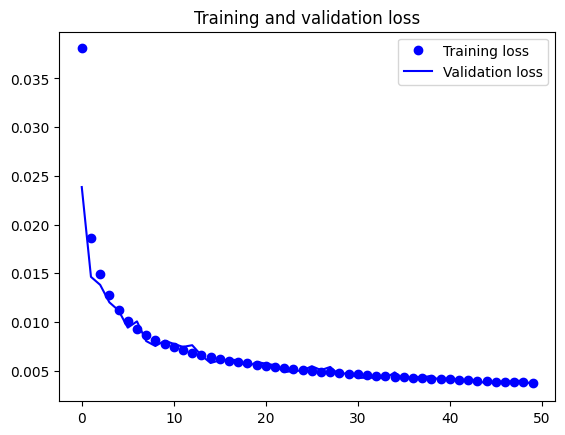

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Из графика следует, что потеря на проверочной выборке и потеря на обучающей выборке синхронизированы (почти совпадают). Это показывает, что  модель не переоснащается: потери при проверке уменьшаются, а не увеличиваются, и редко возникает разрыв между обучением и потерей при проверке.

Следовательно, можно сказать, что обобщающая способность  модели хороша.

Наконец, пришло время реконструировать тестовые изображения, используя predict()  функцию Keras, и посмотреть, насколько хорошо ваша модель способна восстановить тестовые данные.

# Прогнозирование по тестовым данным

Будем использовать обученную модель для  прогноза  на полных 10000 тестовых изображений и рассмотрим несколько восстановленных изображений, чтобы визуализировать, насколько хорошо  модель способна реконструировать тестовые изображения.

In [ ]:
pred = autoencoder.predict(test_data)
pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(10000, 32, 32, 3)

Test Images


<ipython-input-22-3b79ea061532>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("(Label: " + str(label_dict[int(curr_lbl)]) + ")")


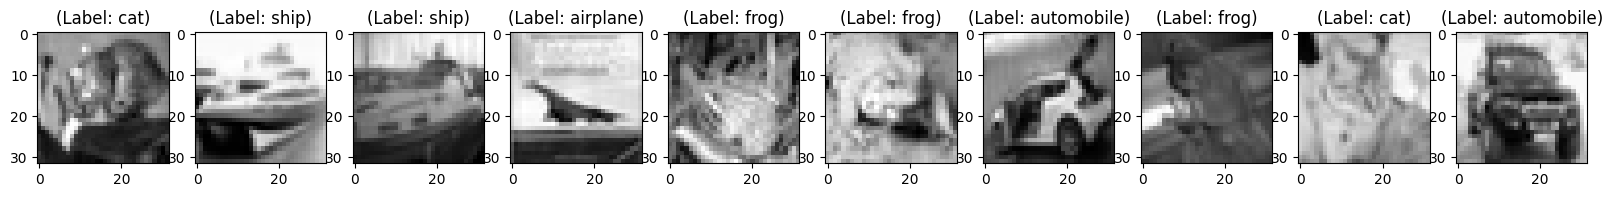

Reconstruction of Test Images


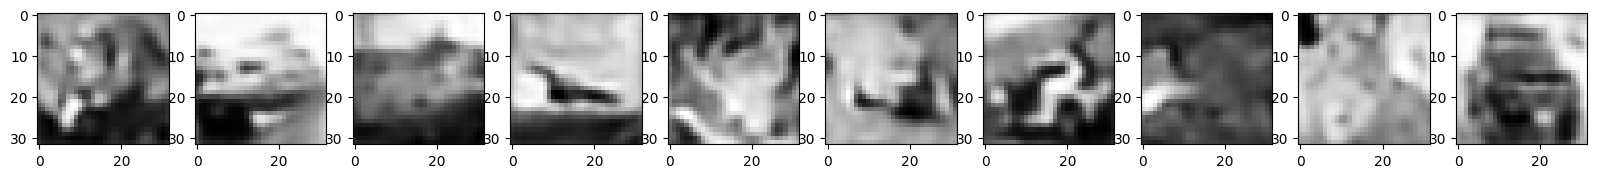

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap = "gray")
    curr_lbl = test_labels[i]
    plt.title("(Label: " + str(label_dict[int(curr_lbl)]) + ")")
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap = "gray")
plt.show()

Из приведенных выше рисунков видно, что  модель проделала фантастическую работу по восстановлению тестовых изображений, которые были предсказаны с помощью этой модели. По крайней мере, из снимков видно, что тестовые и восстановленные изображения выглядят почти одинаково.

# **Сохранение и последующее использование обученной модели**

In [ ]:
autoencoder.save('autoencoderNM.h5')

Выгрузка сохраненной модели на компьютер

In [ ]:
from google.colab import files
files.download('autoencoderNM.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Загрузка модели с компьютера в среду Google Colab

In [ ]:
from google.colab import files
upload = files.upload()

Создание новой модели на основе сохраненной

In [ ]:
from keras.models import load_model
# Загрузка сети из файла
autoencoder=load_model('autoencoderNM.h5')
# 1)Создается модель Keras с описанной в файле архитектурой
# 2) В модель загружаются веса
# 3) Выполняется компиляция модели на основе конфигурации обучения в файле
# 4) Можно перейти к предсказанию

# Есть 7 типов автокодировщиков :

Шумоподавляющие автокодировщики

Глубокие автокодировщики

Разреженные автокодировщики

Сжимающие автокодировщики

Сверточные автокодировщики

Вариационные автокодировщики

Неполные автокодировщики

# Шумоподавляющий автокодировщик

# Denoising Autoencoder

Шумоподавляющий автоэнкодер пытается путем обучения получить представление введенных зашумленных данных (скрытое пространство или узкое место), устойчивое к шуму. Вы добавляете шум к изображению, а затем подаете зашумленное изображение в качестве входного сигнала в часть encoder вашей сети. Кодирующая часть автоэнкодера преобразует изображение в другое пространство, которое пытается сохранить алфавиты, но удаляет шум.

Но как это точно удалить шум?

Во время обучения вы определяете функцию потерь, аналогичную среднеквадратичной ошибке, которую вы определили ранее в сверточном автоэнкодере. На каждой итерации обучения сеть будет вычислять потерю между зашумленным изображением, выводимым декодером, и истинным  (изображение без шума), а также будет пытаться минимизировать эту потерю или разницу между восстановленным изображением и исходным изображением без помех. Другими словами, сеть изучит пространство 7 x 7 x 128, которое будет без помех кодировать данные, на которых вы будете тренировать свою сеть!

Теперь, чтобы увидеть, как это работает в Python, вы будете использовать тот же набор данных NotMNIST, который вы использовали в первой части этого урока. Это означает, что вам не нужно выполнять какую-либо предварительную обработку данных, поскольку это уже было сделано ранее! Тем не менее, одним из важных этапов предварительной обработки в этой части руководства будет добавление шума к изображениям для обучения, проверки и тестирования. Итак, давайте быстро сделаем это в первую очередь!


# **Добавление шума к изображениям**
Давайте сначала определим коэффициент шума, который является гиперпараметром. Коэффициент шума умножается на случайную матрицу со средним значением 0,0 и стандартным отклонением 1,0. Эта матрица будет отбирать образцы из нормального (гауссовского) распределения. Форма случайного нормального массива будет аналогична форме данных, которые вы будете добавлять к шуму.

Для простоты давайте разберемся с этим на примере: переменная train_X  имеет форму 48000 x 28 x 28 x 1. Следовательно, случайный нормальный массив также будет иметь форму, аналогичную train_X. Тогда вы сможете сложить два массива, если они будут иметь одинаковые  размеры.

In [ ]:
noise_factor = 0.5
x_train_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)
x_valid_noisy = valid_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_X.shape)
x_test_noisy = test_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_data.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Функция np.clip()   все отрицательные значения установит в ноль, а все значения больше, чем один, приведет  к одному,  желательно, чтобы  значения пикселей были от нуля до единицы (нормализованы). Так как есть вероятность, что после введения шума в данные диапазон значений пикселей может немного измениться, то для большей безопасности рекомендуется обрезать значения пикселей.

# Визуализация шумных изображений

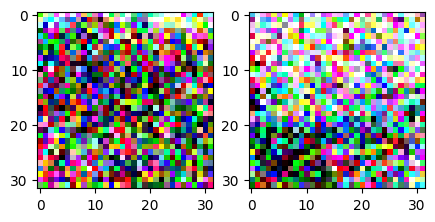

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1], (32,32,3))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1], (32,32,3))
plt.imshow(curr_img, cmap='gray')

Теперь, когда у вас есть зашумленные данные, вы можете подать их в сеть и посмотреть, как шум «волшебным образом» удаляется с изображений!

# Denoising Autoencoder Network

Автоэнкодер разделен на две части: кодер и декодер. Архитектура, которую вы собираетесь построить, будет выглядеть следующим образом:

Кодировщик

Первый слой будет иметь 32 фильтра  3 x 3, за которыми следует слой понижающей дискретизации (max-pooling),
Второй слой будет иметь 64 фильтра 3 x 3, за которыми следует еще один слой понижающей дискретизации.
Последний слой кодера будет иметь 128 фильтров  -3 х 3 .


Декодировщик

Первый слой будет иметь 128 фильтров  -3 х 3, а затем слой с повышением частоты дискретизации.
Второй слой будет иметь 64 фильтра  -3 x 3, за которыми следует еще один слой с повышением частоты дискретизации.
Последний слой кодера будет иметь 1 фильтр размером  3 х 3 .

In [ ]:
batch_size = 256
epochs = 50
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv5)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2)
    return decoded
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


Во время тренировки сверточного автоэнкодера, в качестве входных данных и в качестве эталонов выхода подавался тренировочный набор данных дважды. Однако в шумоподавляющем автоэнкодере в качестве входных данных подаются зашумленные изображения , в то время как эталоном выхода являются исходные изображения, к которым не применялся шум. Только тогда сеть сможет рассчитать потери между зашумленными и настоящими  изображениями и обучить весовые коэффициенты.

In [ ]:
autoencoder_train = autoencoder.fit(x_train_noisy, train_X, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid_noisy, valid_X))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0517 - val_loss: 0.0250
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0248 - val_loss: 0.0209
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - val_loss: 0.0182
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0184 - val_loss: 0.0165
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0173 - val_loss: 0.0169
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0168 - val_loss: 0.0167
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0158 - val_loss: 0.0147
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0152 - val_loss: 0.0156
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0149 - val_loss: 0.0152
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - val_loss: 0.0160
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━

# Сравнение динамики ошибок на обучающем и проверочном наборах данных

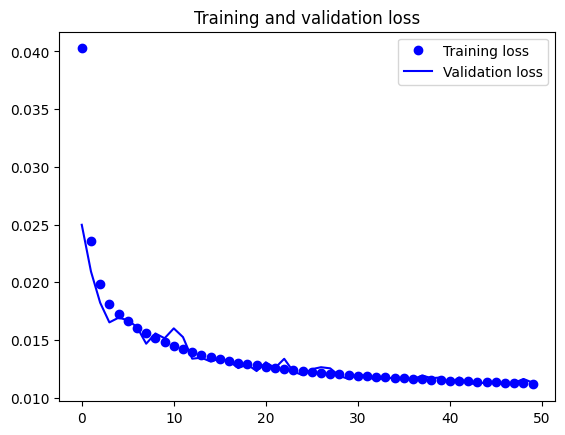

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Из приведенного выше графика вы можете получить некоторую интуицию о том, что модель в некоторые эпохи переоснащается, в то время как большую часть времени она синхронизирована. Вы можете определенно попытаться улучшить производительность модели, добавив в нее некоторую сложность, чтобы потери могли уменьшаться больше, попробуйте обучить ее большему количеству эпох, а затем принять решение.

# **Прогнозирование на наборе тестовых данных**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Images


<ipython-input-31-790326601c41>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("(Label: " + str(label_dict[int(curr_lbl)]) + ")")


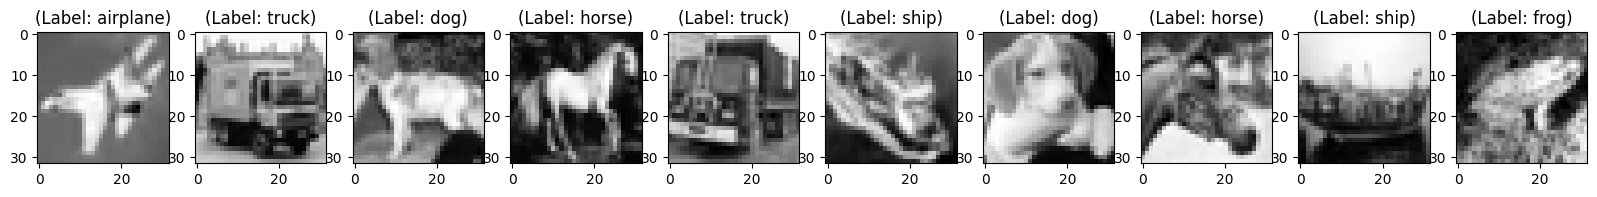

Test Images with Noise


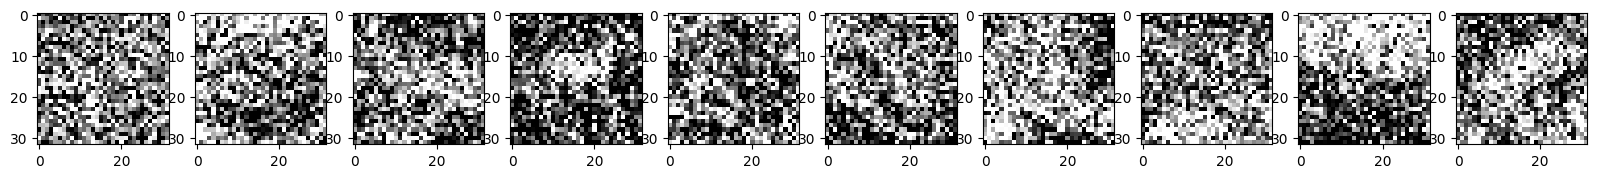

Reconstruction of Noisy Test Images


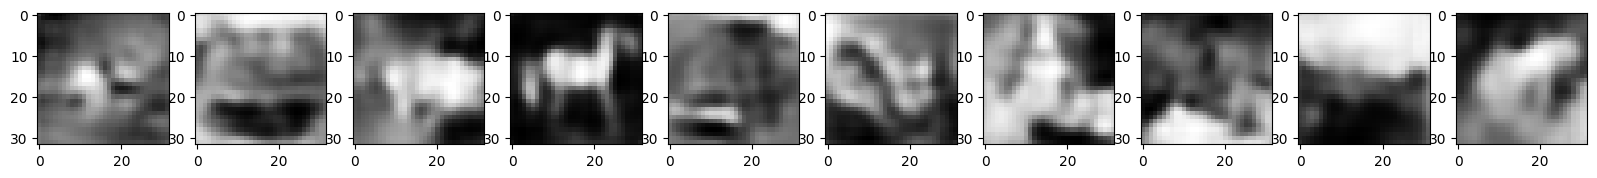

In [ ]:
pred = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap='gray')
    curr_lbl = test_labels[i]
    plt.title("(Label: " + str(label_dict[int(curr_lbl)]) + ")")
plt.show()
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')
plt.show()

Похоже, что всего за 20 эпох довольно простая сетевая архитектура довольно неплохо справилась с удалением шума из тестовых изображений, не так ли?

# Задание

1.	В ноутбуке cifar10 добавить вывод изображений для демонстрации обученности НС подобно тому, как это делается в ноутбуке Svert_Nina.ipynb
2.	В сверточной НС и в автокодировщике графически показать, что получается на картах каждого слоя.
3. Применить автокодировщик к набору данных Cifar10


# Контрольные вопросы

1.	Какие задачи решают автокодировщики?
Автоэнкодеры — это нейронные сети прямого распространения, которые восстанавливают входной сигнал на выходе. Внутри у них имеется скрытый слой, который представляет собой код, описывающий модель. Автоэнкодеры конструируются таким образом, чтобы не иметь возможность точно скопировать вход на выходе.


2.	Каков основной принцип работы автокодировщиков?


3.	Что такое многослойный автокодировщик? Какова его структура?

У глубокого автоэнкодера больше число слоев и самое главное — нелинейная функция активации между ними (в нашем случае ELU — Exponential Linear Unit).

4.	Какие виды автокодировщиков Вы знаете?
Есть 7 типов автокодировщиков :
-Шумоподавляющие автокодировщики
-Глубокие автокодировщики
-Разреженные автокодировщики
-Сжимающие автокодировщики
-Сверточные автокодировщики
-Вариационные автокодировщики
-Неполные автокодировщики

5.	Опишите принцип работы шумоподавляющего автокодировщика.
6.	Как работает вариационный автокодировщик?
  
  Вариационный автокодировщик (Variational Autoencoder – VAE) — генеративная модель, которая находит применение во многих областях исследований: от генерации новых человеческих лиц до создания полностью искусственной музыки.

Прежде всего, зачем нужен вариационный автоэнкодер?
Генеративные модели используют для того, чтобы производить случайные выходные данные, которые выглядят схоже с тренировочным набором данных, и тоже самое можно делать с помощью VAEs.
7.	Как , используя автокодировщик для предобучения нейронной сети, создать нейронную сеть-классификатор?
8.	Из каких частей состоит автокодировщик? Каково назначение и функции каждой части?
9.	Можно ли использовать автокодировщик для сжатия информации об изображении?
10.	Что такое сверточный автокодировщик?
11.	Что такое глубокий автокодировщик?
12.	Какие автокодировщики используются для генерации новых изображений?
  